In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x_train = np.load("./data/Xtrain_Classification_Part1.npy")
y_train = np.load("./data/Ytrain_Classification_Part1.npy")

In [13]:
image_1 = x_train[1,:]

In [15]:
image1_5050 = np.reshape(image_1,(50,50))

1.0


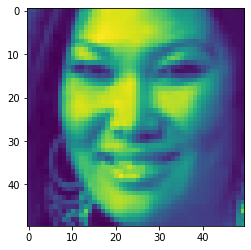

In [18]:
plt.imshow(image1_5050)
print(y_train[0])

## Perceptron

In [7]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay

BACC = 0.8183324478601874


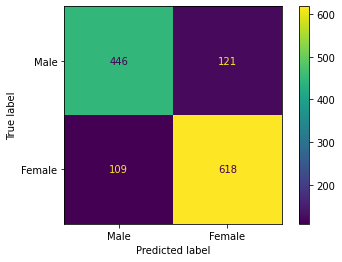

In [9]:
train_x, test_x, train_y, test_y  = train_test_split(x_train, y_train, test_size=0.2)

clf = Pipeline([
    ("scaler", StandardScaler()),
    ("perceptron", Perceptron(tol=1e-3, random_state=0))
])
clf.fit(train_x, train_y)

y_hat = clf.predict(test_x)
conf = confusion_matrix(test_y, y_hat)
bacc = balanced_accuracy_score(test_y, y_hat)
# true positives and negatives
# tn, fp, fn, tp = confusion_matrix(test_y, y_hat).ravel()
ConfusionMatrixDisplay.from_predictions(test_y, y_hat,display_labels=["Male", "Female"])
print(f"BACC = {bacc}")

## Multilayer Perceptron

Iteration 1, loss = 0.57811827
Iteration 2, loss = 0.39786974
Iteration 3, loss = 0.34248488
Iteration 4, loss = 0.31945905
Iteration 5, loss = 0.28202378
Iteration 6, loss = 0.25856007
Iteration 7, loss = 0.23616392
Iteration 8, loss = 0.22840991
Iteration 9, loss = 0.20377339
Iteration 10, loss = 0.19890307
Iteration 11, loss = 0.17499417
Iteration 12, loss = 0.16446487
Iteration 13, loss = 0.15746857
Iteration 14, loss = 0.15393076
Iteration 15, loss = 0.13898983
Iteration 16, loss = 0.13636265
Iteration 17, loss = 0.13005983
Iteration 18, loss = 0.11593489
Iteration 19, loss = 0.13583354
Iteration 20, loss = 0.10788078
BACC = 0.8183324478601874


/home/helder/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


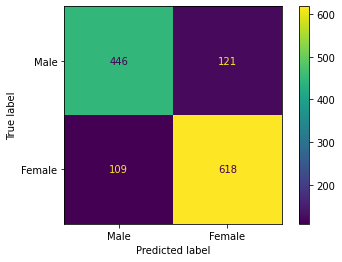

In [10]:
# lbfgs - Adam for large DataSets For small datasets, however, ‘lbfgs’ can converge faster and perform better.
mlp = Pipeline([
        ('scaler', StandardScaler()),
        ('mpl', MLPClassifier(
            hidden_layer_sizes=(50,10),
            max_iter=20,
            alpha=1e-4,
            solver="sgd",
            verbose=10,
            random_state=1,
            learning_rate_init=0.1,
    ))]
)


mlp.fit(train_x, train_y)
y_hat = clf.predict(test_x)
#conf = confusion_matrix(test_y, y_hat)
bacc = balanced_accuracy_score(test_y, y_hat)
# true positives and negatives
# tn, fp, fn, tp = confusion_matrix(test_y, y_hat).ravel()
ConfusionMatrixDisplay.from_predictions(test_y, y_hat, display_labels=["Male", "Female"])
print(f"BACC = {bacc}")

# Tensorflow

BACC = 0.5


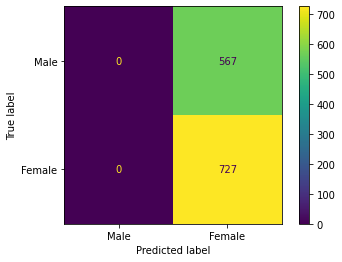

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
from sklearn.preprocessing import MinMaxScaler

# scalar = MinMaxScaler()
# train_x_01 = scalar.fit(train_x)
# test_x_01 = scalar.fit(test_x)

train_x_01 = train_x/255
test_x_01 = test_x/255

# reduzir tamanho da image

model = models.Sequential()
model.add(layers.Dense(1000, input_dim=2500, activation="relu"))
model.add(layers.Dense(1000, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam")
model.fit(train_x, train_y, epochs=20, verbose=0)

# y_hat = np.argmax(model.predict(test_x_01), axis=1)
y_hat = (model.predict(test_x_01) > 0.5).astype("int32")
bacc = balanced_accuracy_score(test_y, y_hat)
ConfusionMatrixDisplay.from_predictions(test_y, y_hat, display_labels=["Male", "Female"])
print(f"BACC = {bacc}")


In [27]:
y_hat = model.predict(test_x_01)
y_hat

array([[0.459793  ],
       [0.46391523],
       [0.45938167],
       ...,
       [0.46018702],
       [0.45892674],
       [0.4658144 ]], dtype=float32)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 25)        250       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 25)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 50)        11300     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 50)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 9, 64)          28864     
_________________________________________________________________
flatten_5 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)              

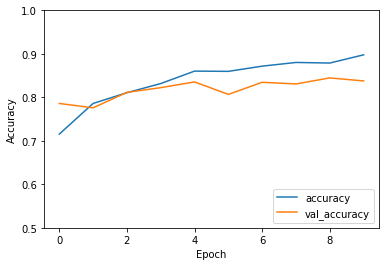

In [47]:
# https://www.tensorflow.org/tutorials/images/cnn
# https://www.tensorflow.org/tutorials/quickstart/advanced

import tensorflow as tf

from tensorflow.keras import layers, models

train_x, test_x, train_y, test_y  = train_test_split(x_train, y_train, test_size=0.2)

train_x = np.reshape(train_x, (len(train_x), 50, 50, 1))
test_x = np.reshape(test_x, (len(test_x),50, 50, 1))


model = models.Sequential()
model.add(layers.Conv2D(25, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(50, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Flatten
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation="softmax"))
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=10, 
                    validation_data=(test_x, test_y))

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

print(test_acc)